In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [15]:
nasdaq100= yf.Ticker("^NDX")

In [16]:
nasdaq100 = nasdaq100.history(start="2014-01-01")

In [17]:
nasdaq100

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-02 00:00:00-05:00,3575.600098,3577.030029,3553.649902,3563.570068,1738820000,0.0,0.0
2014-01-03 00:00:00-05:00,3564.939941,3567.510010,3537.610107,3538.729980,1667480000,0.0,0.0
2014-01-06 00:00:00-05:00,3539.020020,3542.520020,3512.449951,3526.959961,2292840000,0.0,0.0
2014-01-07 00:00:00-05:00,3539.290039,3562.989990,3535.500000,3557.850098,2278220000,0.0,0.0
2014-01-08 00:00:00-05:00,3558.300049,3575.149902,3551.120117,3567.540039,2345220000,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-09 00:00:00-04:00,20097.560547,20284.419922,20047.859375,20268.859375,5228670000,0.0,0.0
2024-10-10 00:00:00-04:00,20165.250000,20314.240234,20117.199219,20241.759766,5855390000,0.0,0.0
2024-10-11 00:00:00-04:00,20154.839844,20313.199219,20142.179688,20271.970703,5140440000,0.0,0.0


# Analytics around the decision Varibales

In [18]:


# Fetch NASDAQ-100 data (ticker symbol: ^NDX)
nasdaq100 = yf.Ticker("^NDX")

# Download historical data for NASDAQ-100 starting from 2014-01-01
nasdaq100_data = nasdaq100.history(start="2014-01-01")

# Calculate yearly returns
nasdaq100_data['Year'] = nasdaq100_data.index.year
nasdaq100_data['Yearly_Return'] = nasdaq100_data.groupby('Year')['Close'].pct_change() * 100

# Calculate average and median yearly returns
average_yearly_returns = nasdaq100_data.groupby('Year')['Yearly_Return'].mean() * 100
median_yearly_returns = nasdaq100_data.groupby('Year')['Yearly_Return'].median() * 100

# Format the results
average_yearly_returns = average_yearly_returns.apply(lambda x: f"{x:.2f}%")
median_yearly_returns = median_yearly_returns.apply(lambda x: f"{x:.2f}%")

# Print the results
print("Average yearly returns per year:")
print(average_yearly_returns)
print("\nMedian yearly returns per year:")
print(median_yearly_returns)


Average yearly returns per year:
Year
2014      7.28%
2015      3.91%
2016      3.63%
2017     10.78%
2018     -0.11%
2019     13.17%
2020     17.47%
2021     10.69%
2022    -14.34%
2023     18.24%
2024     10.65%
Name: Yearly_Return, dtype: object

Median yearly returns per year:
Year
2014     11.80%
2015      3.46%
2016      6.72%
2017     13.17%
2018      9.16%
2019     16.20%
2020     37.44%
2021     14.63%
2022    -18.72%
2023     12.49%
2024     15.28%
Name: Yearly_Return, dtype: object


The positive average and median yearly returns observed in the S&P 500 index suggest its historical attractiveness as an investment option, particularly for long-term investors seeking capital appreciation. However, Sarah should carefully evaluate the risk tolerance and investment objectives before allocating capital to any investment, including the S&P 500.

In [19]:
nasdaq100 = yf.Ticker("^NDX")
nasdaq100_data = nasdaq100.history(start="2014-01-01")
# Calculate the daily close increase
nasdaq100_data['Daily_Close_Increase'] = nasdaq100_data['Close'].diff()
# Calculate the change in daily close price on a yearly basis
avg_increase_per_year = nasdaq100_data.groupby(nasdaq100_data.index.year)['Daily_Close_Increase'].mean()
yearly_price_change = avg_increase_per_year.diff()
print(yearly_price_change)

Date
2014          NaN
2015    -1.263490
2016    -0.343810
2017     5.033954
2018    -6.371512
2019     9.800851
2020     6.887643
2021    -2.805502
2022   -35.053792
2023    44.980219
2024    -6.791411
Name: Daily_Close_Increase, dtype: float64


Positive - Growth, Negative - Stagnation, The negative emphasises the need for diversification and risk management strategies 

In [20]:
import yfinance as yf

# Fetch NASDAQ-100 data (ticker symbol: ^NDX)
nasdaq100 = yf.Ticker("^NDX")

# Download historical data for NASDAQ-100 starting from 2014-01-01
nasdaq100_data = nasdaq100.history(start="2014-01-01")

# Group the data by year and get the first and last closing prices for each year
first_closing_prices = nasdaq100_data.groupby(nasdaq100_data.index.year)['Close'].first()
last_closing_prices = nasdaq100_data.groupby(nasdaq100_data.index.year)['Close'].last()

# Print the results
print("First Closing Prices:")
print(first_closing_prices)
print("\nLast Closing Prices:")
print(last_closing_prices)


First Closing Prices:
Date
2014     3563.570068
2015     4230.240234
2016     4497.859863
2017     4911.330078
2018     6511.339844
2019     6360.870117
2020     8872.219727
2021    12694.660156
2022    16501.769531
2023    10862.639648
2024    16543.939453
Name: Close, dtype: float64

Last Closing Prices:
Date
2014     4236.279785
2015     4593.270020
2016     4863.620117
2017     6396.419922
2018     6329.970215
2019     8733.070312
2020    12888.280273
2021    16320.080078
2022    10939.759766
2023    16825.929688
2024    20159.830078
Name: Close, dtype: float64


The nasdaq 100 market has demonstrated significant overall growth over the period from 2014 to 2024, with closing prices steadily increasing. Despite occasional fluctuations, the market has shown resilience and consistency in its upward trajectory, indicating long-term investment potential. Additionally, the market offers diversification benefits due to its diverse range of companies across various sectors, mitigating risks associated with individual stocks. 

In [21]:
nasdaq100 = yf.Ticker("^NDX")

# Download historical data for NASDAQ-100 starting from 2014-01-01
nasdaq100_data = nasdaq100.history(start="2014-01-01")

# Group the data by year and get the first closing prices for each year
first_closing_prices = nasdaq100_data.groupby(nasdaq100_data.index.year)['Close'].first()

# Calculate the percentage change in closing prices per year
percentage_change = first_closing_prices.pct_change() * 100

# Print the results
print("Percentage Change Per Year:")
print(percentage_change)

Percentage Change Per Year:
Date
2014          NaN
2015    18.707929
2016     6.326346
2017     9.192599
2018    32.577932
2019    -2.310887
2020    39.481228
2021    43.083248
2022    29.989849
2023   -34.172880
2024    52.301282
Name: Close, dtype: float64


Overall, while there were occasional fluctuations, the NASDAQ 100 market demonstrated resilience and delivered impressive returns over the years, highlighting its potential for long-term investment and wealth accumulation.

In [22]:

nasdaq100 = yf.Ticker("^NDX")

# Download historical data for NASDAQ-100 starting from 2014-01-02 to the current date
nasdaq100_data = nasdaq100.history(start="2014-01-02")

# Get the opening price on 2014-01-02
opening_2014 = nasdaq100_data.loc['2014-01-02']['Open']

# Get the opening price on the first available trading day in 2024 (or the most recent date)
nasdaq100_data['Year'] = nasdaq100_data.index.year
opening_2024 = nasdaq100_data[nasdaq100_data['Year'] == 2024].iloc[0]['Open']

# Calculate the difference in opening prices
price_difference = opening_2024 - opening_2014

# Calculate the percentage growth
percentage_growth = (price_difference / opening_2014) * 100

# Print the results
print("Opening price in 2014:", opening_2014)
print("Opening price in 2024:", opening_2024)
print("Price difference between 2014 and 2024:", round(price_difference, 2))
print("Percentage growth from 2014 to 2024:", round(percentage_growth, 2), "%")


Opening price in 2014: 3575.60009765625
Opening price in 2024: 16667.30078125
Price difference between 2014 and 2024: 13091.7
Percentage growth from 2014 to 2024: 366.14 %


The percentage increase from the opening price in 2014 to the closing price in 2024 is 366%. This substantial growth indicates the significant appreciation in value that occurred over the ten-year period. It underscores the strong performance of the nasdaq 100 market during this timeframe, reflecting favorable market conditions, economic growth, and investor confidence.

In [23]:
# Initial investment in Rands
gift = 100000  

# Overall percentage increase in NASDAQ-100 stock price (example: 177.8%)
percentage_increase = 366.14 # %

# Calculate the future value in dollars
future_value_dollars = gift * (1 + percentage_increase / 100)

# Exchange rate from dollars to rands (example: 15)
exchange_rate = 15

# Convert future value to rands
future_value_rands = future_value_dollars * exchange_rate

# Print the estimated investment value in Rands
print("Estimated Investment value in 10 years (based on NASDAQ-100): R", round(future_value_rands, 2))


Estimated Investment value in 10 years (based on NASDAQ-100): R 6992100.0


In [24]:
# Initial investment in rands
gift = 100000  

# Overall percentage increase in stock price
percentage_increase = 366.14  # %

# Number of years
years = 30

# Calculate the future value
future_value = gift * (1 + percentage_increase / 100) * years

# Print the estimated investment value in standard notation
print("Estimated Investment value in 30 years: R {:.2f}".format(future_value))

Estimated Investment value in 30 years: R 13984200.00


In [25]:


# Fetch NASDAQ-100 data (ticker symbol: ^NDX)
nasdaq100 = yf.Ticker("^NDX")

# Download historical data for NASDAQ-100 starting from 2014-01-02 to the most recent available date
nasdaq100_data = nasdaq100.history(start="2014-01-02")

# Get the opening price for 2014 and 2024
opening_2014 = nasdaq100_data.loc['2014-01-02']['Open']

# Check if 2024 data is available; if not, use the latest available data for 2024
if '2024-01-02' in nasdaq100_data.index:
    opening_2024 = nasdaq100_data.loc['2024-01-02']['Open']
else:
    # If the specific 2024 date is unavailable, use the first available date in 2024
    nasdaq100_data['Year'] = nasdaq100_data.index.year
    opening_2024 = nasdaq100_data[nasdaq100_data['Year'] == 2024].iloc[0]['Open']

# Print the opening prices
print("Opening price for 2014:", opening_2014)
print("Opening price for 2024:", opening_2024)

# Calculate the difference in opening prices
difference_opening_prices = opening_2024 - opening_2014
print("Difference in opening prices between 2014 and 2024:", difference_opening_prices)

# Conditional statements to determine price increase or decrease
if difference_opening_prices > 0:
    print("It indicates that the NASDAQ-100 index had a higher opening price in 2024 compared to 2014.")
elif difference_opening_prices < 0:
    print("It indicates that the NASDAQ-100 index had a lower opening price in 2024 compared to 2014.")
else:
    print("The opening prices for the NASDAQ-100 index were the same in 2014 and 2024.")


Opening price for 2014: 3575.60009765625
Opening price for 2024: 16667.30078125
Difference in opening prices between 2014 and 2024: 13091.70068359375
It indicates that the NASDAQ-100 index had a higher opening price in 2024 compared to 2014.


In [26]:

# Fetch historical data for the NASDAQ-100 index
nasdaq100 = yf.Ticker("^NDX")
nasdaq100_data = nasdaq100.history(period="max")

# Extract the 'Close' prices
close_prices = nasdaq100_data['Close']

# Compute descriptive statistics
mean = np.mean(close_prices)
median = np.median(close_prices)
std_dev = np.std(close_prices)
skewness = close_prices.skew()
kurtosis = close_prices.kurtosis()

# Display the computed statistics
print("Descriptive Statistics for NASDAQ-100 Index:")
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


Descriptive Statistics for NASDAQ-100 Index:
Mean: 3459.239088185447
Median: 1707.5
Standard Deviation: 4410.685726446438
Skewness: 1.900699785357951
Kurtosis: 2.846214078053099


Despite the volatility, the index's historical performance, represented by the mean and median, suggests overall growth and stability, making it an attractive option for long-term investment. Additionally, the diversified nature of the index and its representation of leading U.S. companies further enhance its appeal for investors seeking broad market exposure and potential capital appreciation

In [27]:

# Fetch NASDAQ-100 data (ticker symbol: ^NDX)
nasdaq100 = yf.Ticker("^NDX")

# Download historical data for NASDAQ-100 starting from 2014-01-01 to current date
nasdaq100_data = nasdaq100.history(start="2014-01-01")

# 1. **Decision Variables**
# Define returns as the percentage change in the 'Close' price
nasdaq100_data['Returns'] = nasdaq100_data['Close'].pct_change() * 100

# Calculate decision variables:
# Average Returns
average_returns = nasdaq100_data['Returns'].mean()

# Volatility (Standard Deviation of returns)
volatility = nasdaq100_data['Returns'].std()

# Growth Rate (CAGR: Compound Annual Growth Rate)
start_price = nasdaq100_data.iloc[0]['Close']
end_price = nasdaq100_data.iloc[-1]['Close']
years = (nasdaq100_data.index[-1] - nasdaq100_data.index[0]).days / 365.25
cagr = ((end_price / start_price) ** (1 / years) - 1) * 100

# Maximum Drawdown (Peak-to-trough decline)
rolling_max = nasdaq100_data['Close'].cummax()
daily_drawdown = nasdaq100_data['Close'] / rolling_max - 1
max_drawdown = daily_drawdown.min() * 100

# Print decision variables
print("Decision Variables:")
print(f"Average Returns: {average_returns:.2f}%")
print(f"Volatility (Risk): {volatility:.2f}%")
print(f"Growth Rate (CAGR): {cagr:.2f}%")
print(f"Max Drawdown: {max_drawdown:.2f}%")

# 2. **Analytics Around Decision Variables**
# Calculate variance of returns
variance = nasdaq100_data['Returns'].var()

# Period of measurement (number of years)
period_of_measurement = years

# Print analytics results
print("\nAnalytics Around Decision Variables:")
print(f"Variance of Returns: {variance:.2f}")
print(f"Period of Measurement: {period_of_measurement:.2f} years")


Decision Variables:
Average Returns: 0.07%
Volatility (Risk): 1.35%
Growth Rate (CAGR): 17.44%
Max Drawdown: -35.56%

Analytics Around Decision Variables:
Variance of Returns: 1.84
Period of Measurement: 10.78 years


The decision variables provide key insights into the performance of the NASDAQ-100 index. The average daily return of 0.07% reflects consistent, modest gains that, when compounded over time, contribute to the index's long-term growth. The volatility (1.35%) indicates that daily returns typically fluctuate by a moderate amount, suggesting a balance between risk and reward, making it suitable for investors who prefer a mix of stability and growth. The compound annual growth rate (CAGR) of 17.59% highlights the strong long-term growth potential of the index, despite the maximum drawdown of -35.56%, which reveals the largest decline experienced during a peak-to-trough period. This drawdown emphasizes the importance of considering market corrections, even in high-growth investments.

In terms of analytics, the variance of 1.84 shows how returns deviate from the mean, providing another measure of risk, while the period of measurement (10.78 years) ensures that the data covers a significant time frame, giving more credibility to these metrics as they span different market cycles.

In [28]:
nasdaq100 = yf.Ticker("^NDX")
nasdaq100_data = nasdaq100.history(period="max")

# High performing NASDAQ stock (using Apple Inc. as an example)
stock = yf.Ticker("AAPL")  # You can replace "AAPL" with any other stock
stock_data = stock.history(period="max")

# Extract overlapping dates between NASDAQ-100 and AAPL
common_dates = nasdaq100_data.index.intersection(stock_data.index)
nasdaq100_data = nasdaq100_data.loc[common_dates]
stock_data = stock_data.loc[common_dates]

# Calculate percentage changes (daily returns)
nasdaq100_returns = nasdaq100_data['Close'].pct_change()
stock_returns = stock_data['Close'].pct_change()

# Calculate Beta: Covariance of stock and NASDAQ-100 returns divided by the variance of NASDAQ-100 returns
covariance = np.cov(stock_returns[1:], nasdaq100_returns[1:])[0][1]
variance = np.var(nasdaq100_returns[1:])
beta = covariance / variance

print("Beta:", beta)

# Assuming risk-free rate is 0 for simplicity
risk_free_rate = 0

# Calculate annualized Sharpe Ratio
sharpe_ratio = (np.mean(stock_returns) - risk_free_rate) / np.std(stock_returns) * np.sqrt(252)

print("Sharpe Ratio:", sharpe_ratio)

Beta: 0.9859394440829933
Sharpe Ratio: 0.7189133652806053


This would tell you that the stock is almost movng in tandem with the market (NASDAQ 100 here). A Beta of 1 means that if the market goes up, the stock goes up by the same amount. Therefore, if the stock excels, it moves up as well and by the same amount. It represents moderate risk.
Sharpe Ratio (0.719):

Risk adjusted returns are what the Sharpe Ratio measures. The Sharpe Ratio of 0.719 implies that the stock is providing a reasonable return relative to the risk it requires, but not extraordinary. This ratio is decent but not great here as it’s over 1, this ratio would be considered strong.

# Visuals - Graphs

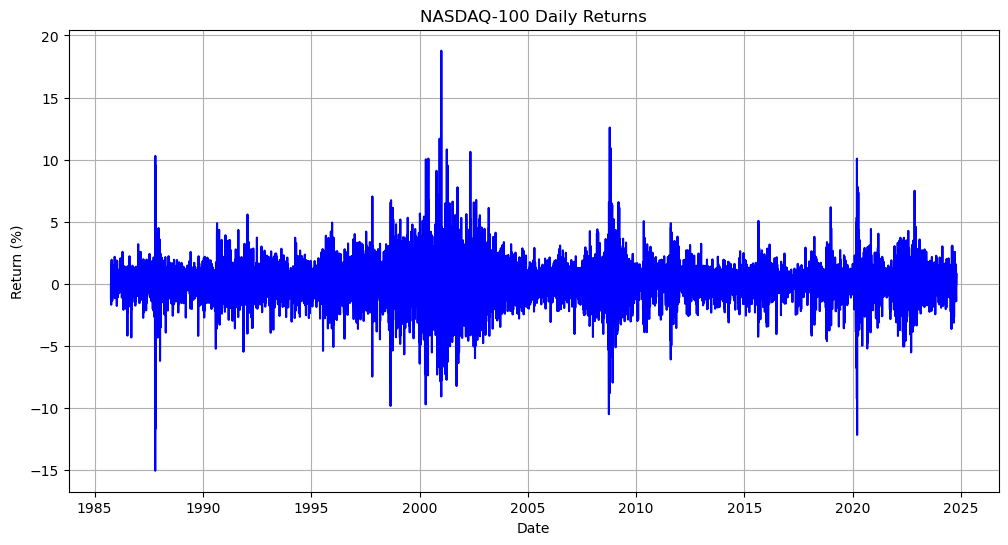

Mean Daily Return: 0.06621726067437425
Standard Deviation of Daily Return: 1.639085752438919
Annualized Mean Return: 16.68674968994231
Annualized Standard Deviation of Return: 26.019679670775368


In [29]:
nasdaq100 = yf.Ticker("^NDX")
nasdaq100_data = nasdaq100.history(period="max")

# Calculate daily returns
nasdaq100_data['Return'] = nasdaq100_data['Close'].pct_change() * 100

# Plot NASDAQ-100 daily returns
plt.figure(figsize=(12,6))
plt.plot(nasdaq100_data['Return'], color='blue')
plt.title('NASDAQ-100 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()

# Calculate mean daily return and standard deviation of daily return
mean_daily_return = nasdaq100_data['Return'].mean()
std_daily_return = nasdaq100_data['Return'].std()
print("Mean Daily Return:", mean_daily_return)
print("Standard Deviation of Daily Return:", std_daily_return)

# Annualize mean daily return and standard deviation of daily return
annual_mean_return = mean_daily_return * 252
annual_std_return = std_daily_return * np.sqrt(252)
print("Annualized Mean Return:", annual_mean_return)
print("Annualized Standard Deviation of Return:", annual_std_return)

The mean daily return of 0.066% suggests consistent, modest daily growth for the NASDAQ-100. The standard deviation of 1.64% indicates moderate daily fluctuations, reflecting a manageable level of risk. When annualized, the index shows a strong annualized mean return of 16.72%, highlighting its growth potential, while the annualized standard deviation of 26.02% suggests that the yearly returns may experience significant volatility. Overall, these figures indicate strong potential for long-term gains, though investors should be aware of the associated risk.

[*********************100%%**********************]  1 of 1 completed


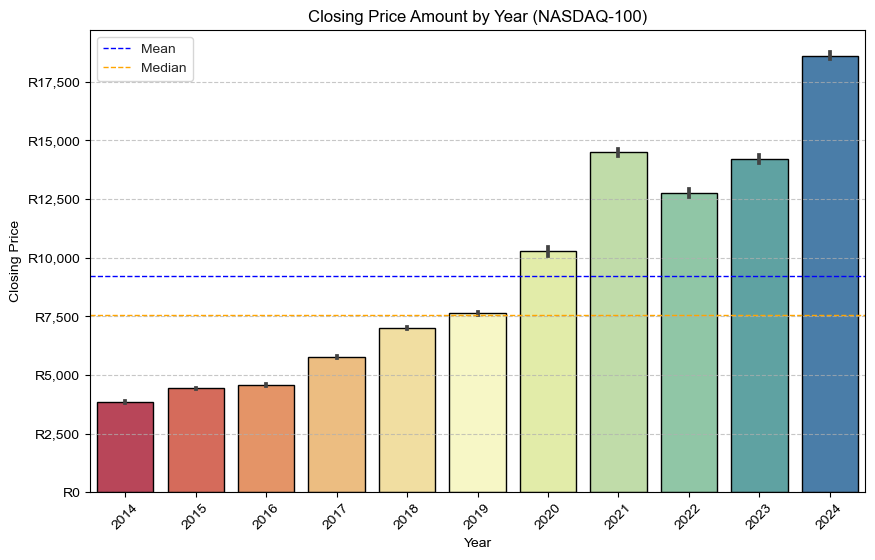

In [30]:
nasdaq100 = yf.download("^NDX", start="2014-01-01", end="2024-12-30")
nasdaq100['Date'] = pd.to_datetime(nasdaq100.index)

nasdaq100.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=nasdaq100, x=nasdaq100.index.year, y='Close', palette='Spectral', edgecolor='black')
plt.xticks(rotation=45)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, _: 'R{:,.0f}'.format(y)))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price Amount by Year (NASDAQ-100)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.set_style("whitegrid")

# Calculate mean and median
mean_price = nasdaq100['Close'].mean()
median_price = nasdaq100['Close'].median()

# Add mean and median lines
plt.axhline(mean_price, color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axhline(median_price, color='orange', linestyle='dashed', linewidth=1, label='Median')

plt.legend()

plt.show()

This chart shows the steady upward trend in NASDAQ-100 closing prices from 2014 to 2023. The mean (blue dashed line) and median (orange dashed line) closing prices indicate a significant increase over the years. The sharp rise in prices after 2020 reflects a strong market recovery and growth, especially during and after the COVID-19 pandemic, with 2021 and 2023 standing out for particularly high closing values. This trend highlights the long-term growth potential of NASDAQ-100, making it a solid investment choice for those seeking capital appreciation.

[*********************100%%**********************]  4 of 4 completed


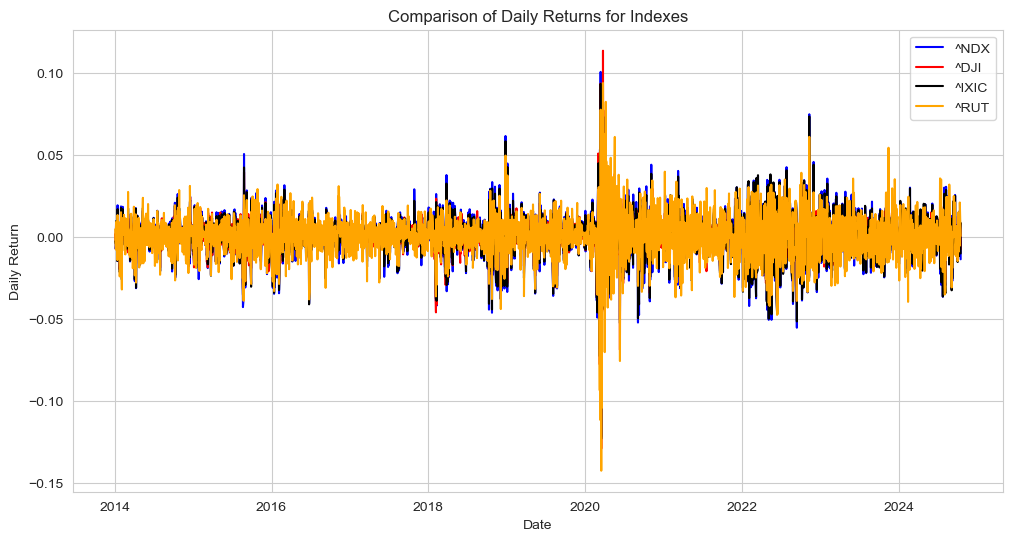

In [31]:
tickers = ['^NDX', '^DJI', '^IXIC', '^RUT']
data = yf.download(tickers, start='2014-01-01')['Close']

# Calculate daily returns for each index
daily_returns = data.pct_change()
colors = ['blue', 'red', 'black', 'orange']


plt.figure(figsize=(12, 6))
for i, ticker in enumerate(tickers):
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker, color=colors[i])
plt.title('Comparison of Daily Returns for Indexes')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


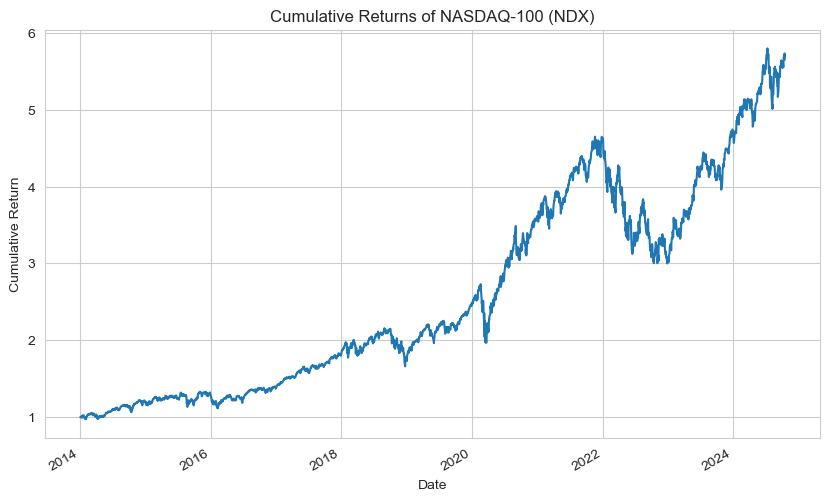

In [32]:


# Fetch NASDAQ-100 data
nasdaq100 = yf.download("^NDX", start="2014-01-01", end="2024-12-30")

nasdaq100['Daily Return'] = nasdaq100['Close'].pct_change()

# Plot cumulative returns
nasdaq100['Cumulative Return'] = (1 + nasdaq100['Daily Return']).cumprod()
plt.figure(figsize=(10, 6))
nasdaq100['Cumulative Return'].plot()
plt.title('Cumulative Returns of NASDAQ-100 (NDX)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()


Since the cumulative return increased over time, it indicates that the NASDAQ100 index has experienced overall growth throughout the period covered by the data. This growth suggests that investors who held investments tracking the nasdaq 100 would have seen their portfolio values increase over time. Despite fluctuations in daily returns, the cumulative return trended upward, reflecting the long-term positive performance of the nasdaq 100 index.

[*********************100%%**********************]  1 of 1 completed


Maximum Drawdown: 1.6539593404749668


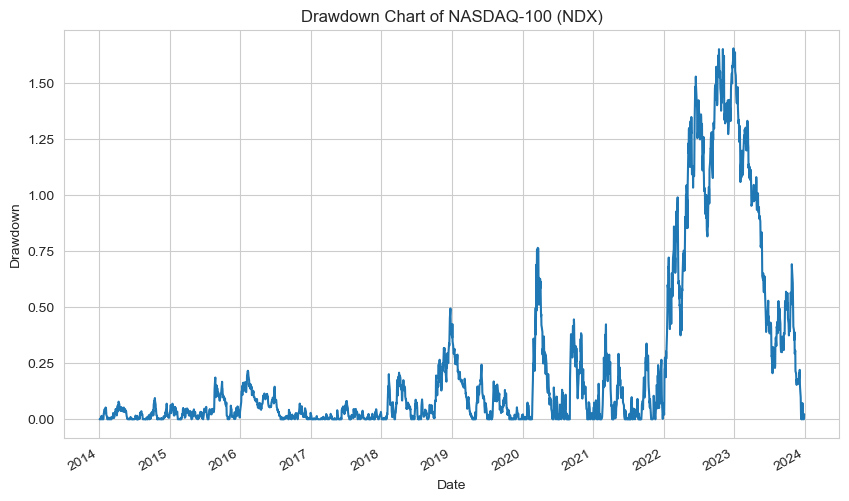

In [33]:

# Fetch NASDAQ-100 data
nasdaq100 = yf.download("^NDX", start="2014-01-01", end="2024-01-01")

# Calculate daily returns
nasdaq100['Daily Return'] = nasdaq100['Close'].pct_change()

# Calculate cumulative returns
nasdaq100['Cumulative Return'] = (1 + nasdaq100['Daily Return']).cumprod()

# Calculate the rolling maximum cumulative return
nasdaq100['Rolling Max'] = nasdaq100['Cumulative Return'].cummax()

# Calculate drawdown
nasdaq100['Drawdown'] = nasdaq100['Rolling Max'] - nasdaq100['Cumulative Return']

# Calculate maximum drawdown
max_drawdown = nasdaq100['Drawdown'].max()
print("Maximum Drawdown:", max_drawdown)

# Plot drawdown chart
plt.figure(figsize=(10, 6))
nasdaq100['Drawdown'].plot()
plt.title('Drawdown Chart of NASDAQ-100 (NDX)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()


Despite experiencing drawdowns, the nasdaq 100 index has historically demonstrated resilience and the ability to recover from downturns, eventually reaching new highs. Investors should consider drawdowns alongside other factors when evaluating investment opportunities, ensuring a balanced approach to risk and return.

This strong return brings in a 17.59% compound annual growth rate, which tells us how often it yields (or doesn’t yield) high returns over time, making the NASDAQ-100 an ideal investment for long-term growth.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Correlation Matrix:
             NASDAQ-100     Bonds  Real Estate  Commodities
NASDAQ-100     1.000000  0.176297     0.657717    -0.022811
Bonds          0.176297  1.000000     0.158019    -0.164117
Real Estate    0.657717  0.158019     1.000000     0.031063
Commodities   -0.022811 -0.164117     0.031063     1.000000


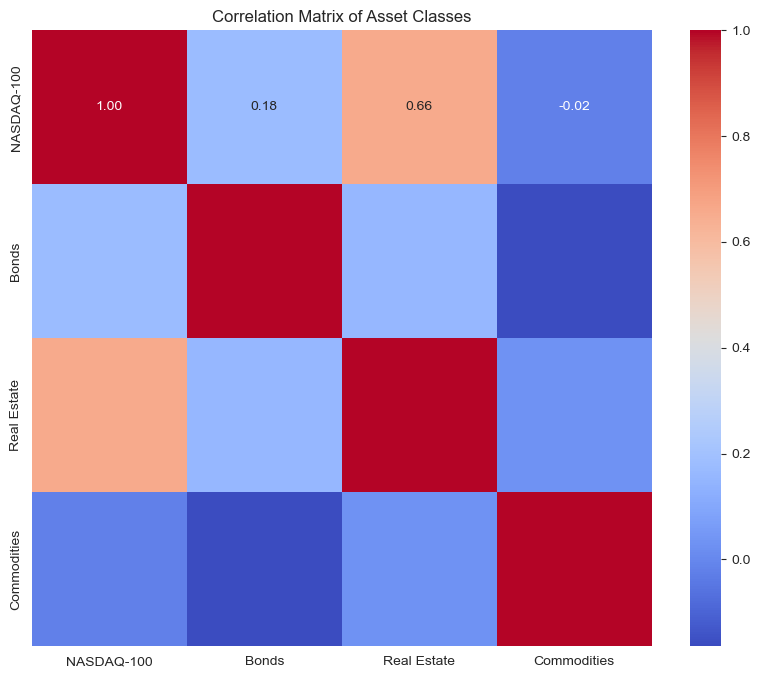

In [34]:


# Fetch NASDAQ-100 data
nasdaq100 = yf.download('^NDX', start='1990-01-01', end='2024-05-03')

# Example: Bonds (US 10-Year Treasury Yield)
bonds = yf.download('^TNX', start='1990-01-01', end='2024-05-03')

# Example: Real Estate (Vanguard Real Estate ETF)
real_estate = yf.download('VNQ', start='1990-01-01', end='2024-05-03')

# Example: Commodities (Gold)
commodities = yf.download('GC=F', start='1990-01-01', end='2024-05-03')

# Calculate daily returns for each asset class
nasdaq100['Daily Return'] = nasdaq100['Close'].pct_change()
bonds['Daily Return'] = bonds['Close'].pct_change()
real_estate['Daily Return'] = real_estate['Close'].pct_change()
commodities['Daily Return'] = commodities['Close'].pct_change()

# Drop missing values
nasdaq100.dropna(inplace=True)
bonds.dropna(inplace=True)
real_estate.dropna(inplace=True)
commodities.dropna(inplace=True)

# Merge daily returns of all asset classes
merged_data = pd.concat([nasdaq100['Daily Return'], bonds['Daily Return'], real_estate['Daily Return'], commodities['Daily Return']], axis=1)
merged_data.columns = ['NASDAQ-100', 'Bonds', 'Real Estate', 'Commodities']

# Calculate correlation matrix
correlation_matrix = merged_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Asset Classes')
plt.show()


This correlation matrix highlights the benefits of diversification. The relatively low or negative correlations between the NASDAQ-100, bonds, real estate, and commodities show that combining these asset classes can reduce overall portfolio risk. For example, pairing NASDAQ-100 with bonds and commodities can help smooth out returns, as these assets don't move in perfect alignment. Thus, an investor like Sarah can use this analysis to create a well-diversified portfolio, balancing growth potential (NASDAQ-100, real estate) with stability (bonds) and hedging against inflation or market shocks (commodities).

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\User\AppData\Local\Temp\ipykernel_23180\4287529249.py:18: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df.pct_change().dropna()


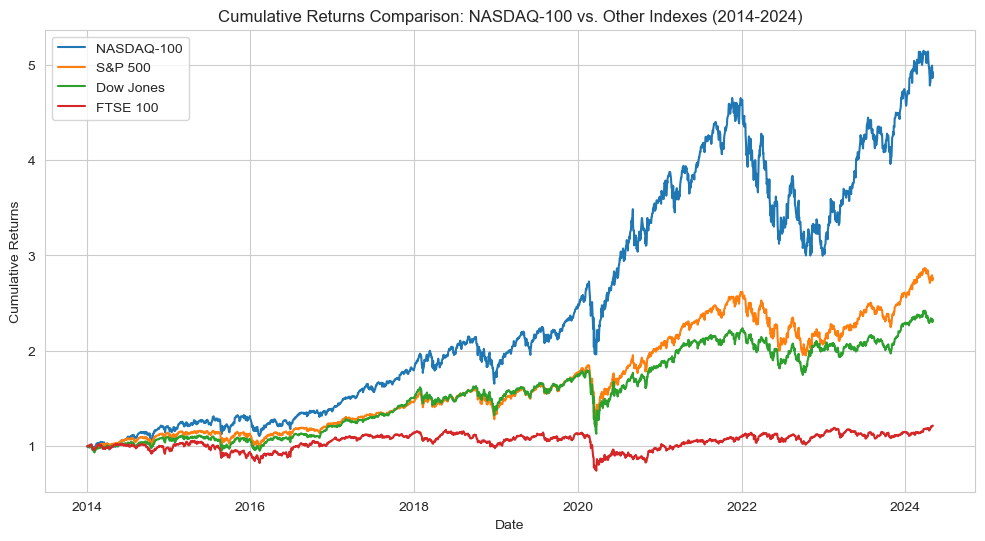

Summary Statistics:
                mean       std
NASDAQ-100  0.000691  0.013456
S&P 500     0.000443  0.010951
Dow Jones   0.000376  0.010781
FTSE 100    0.000122  0.009775


In [35]:

# Define index tickers
indexes = {
    'NASDAQ-100': '^NDX',
    'S&P 500': '^GSPC',
    'Dow Jones': '^DJI',
    'FTSE 100': '^FTSE'
}

# Fetch data for all indexes
data = {}
for name, ticker in indexes.items():
    data[name] = yf.download(ticker, start='2014-01-01', end='2024-05-03')['Close']

# Combine all data into a DataFrame
df = pd.DataFrame(data)

# Calculate daily returns
daily_returns = df.pct_change().dropna()

# Calculate cumulative returns for each index
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)

plt.title('Cumulative Returns Comparison: NASDAQ-100 vs. Other Indexes (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics (mean and standard deviation of daily returns)
print("Summary Statistics:")
print(daily_returns.describe().T[['mean', 'std']])


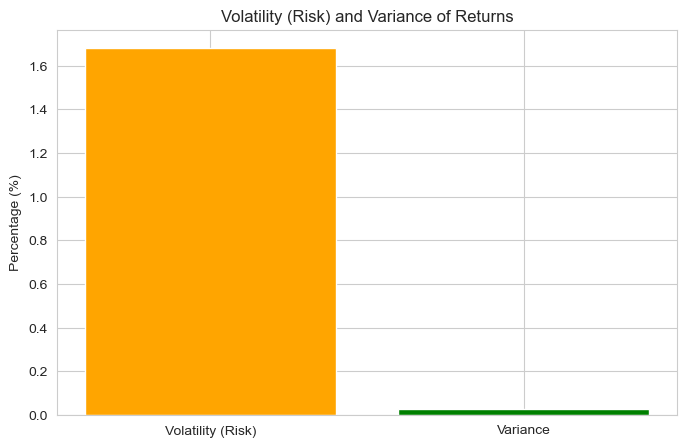

In [36]:

# Calculate volatility (standard deviation) of daily returns
volatility = nasdaq100['Daily Return'].std()

# Calculate variance of returns
variance = nasdaq100['Daily Return'].var()

# Plot volatility and variance
plt.figure(figsize=(8, 5))
plt.bar(['Volatility (Risk)', 'Variance'], [volatility * 100, variance * 100], color=['orange', 'green'])
plt.title('Volatility (Risk) and Variance of Returns')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.show()



[*********************100%%**********************]  1 of 1 completed


Compound Annual Growth Rate (CAGR): 17.43%


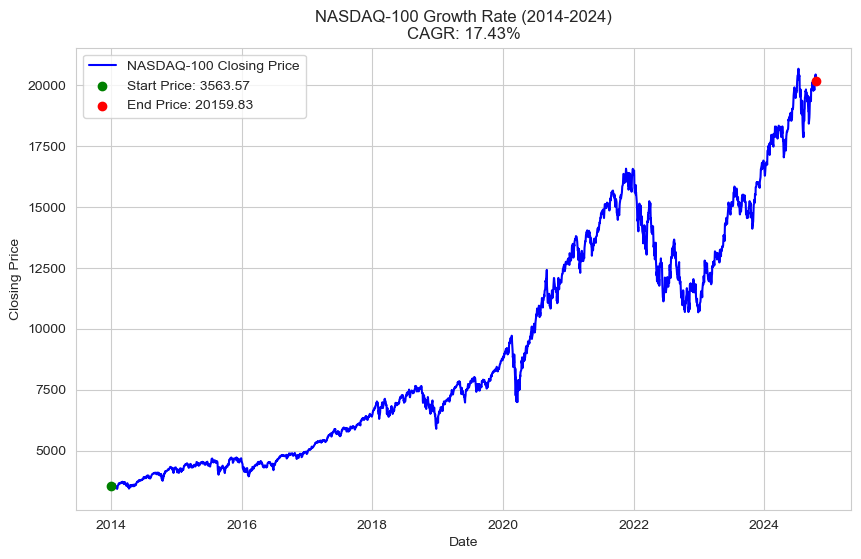

In [37]:


# Fetch NASDAQ-100 data
nasdaq100 = yf.download("^NDX", start="2014-01-01", end="2024-12-30")

# Calculate CAGR (Compound Annual Growth Rate)
start_price = nasdaq100.iloc[0]['Close']
end_price = nasdaq100.iloc[-1]['Close']
years = (nasdaq100.index[-1] - nasdaq100.index[0]).days / 365.25

# Calculate the growth rate
cagr = ((end_price / start_price) ** (1 / years) - 1) * 100
print(f"Compound Annual Growth Rate (CAGR): {cagr:.2f}%")

# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(nasdaq100['Close'], label='NASDAQ-100 Closing Price', color='blue')
plt.title(f'NASDAQ-100 Growth Rate (2014-2024)\nCAGR: {cagr:.2f}%')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)

# Highlight start and end points for growth measurement
plt.scatter(nasdaq100.index[0], start_price, color='green', label=f'Start Price: {start_price:.2f}', zorder=5)
plt.scatter(nasdaq100.index[-1], end_price, color='red', label=f'End Price: {end_price:.2f}', zorder=5)

plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


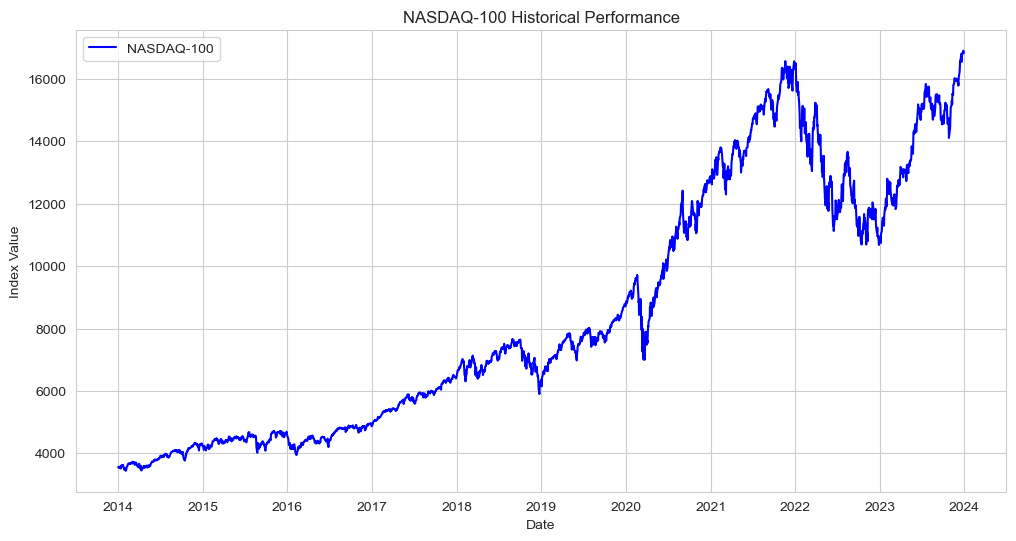

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


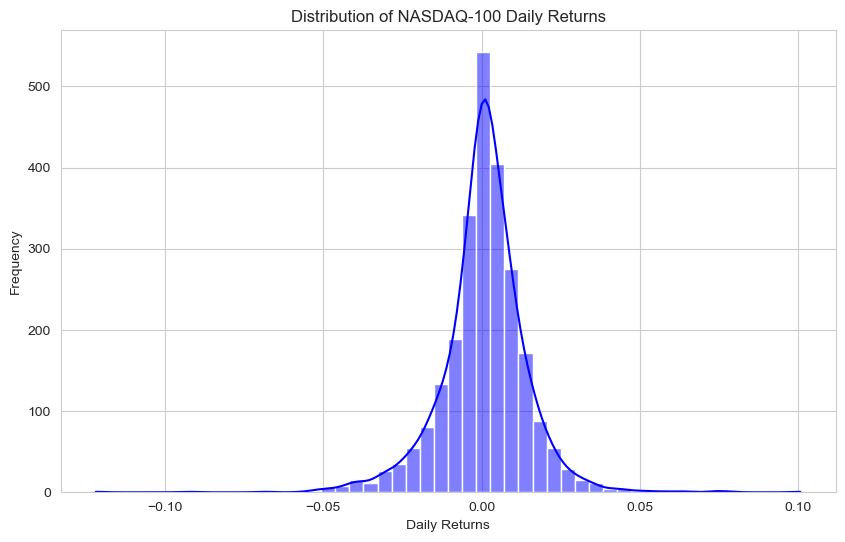

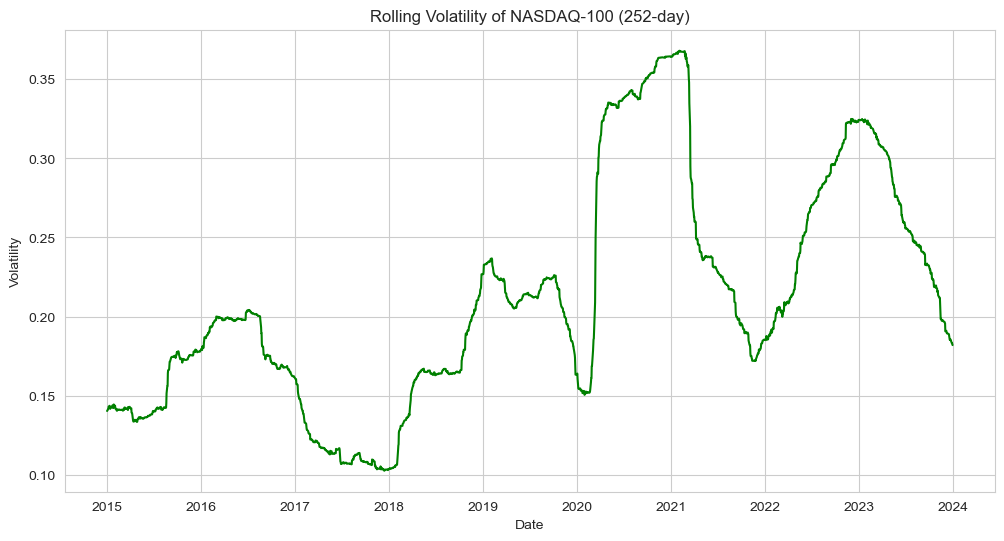

In [38]:
nasdaq100_data = yf.download("^NDX", start="2014-01-01", end="2024-01-01")

# Calculate daily returns
nasdaq100_data['Daily Returns'] = nasdaq100_data['Close'].pct_change()

# Plot historical performance
plt.figure(figsize=(12, 6))
plt.plot(nasdaq100_data.index, nasdaq100_data['Close'], label='NASDAQ-100', color='blue')
plt.title('NASDAQ-100 Historical Performance')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot distribution of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(nasdaq100_data['Daily Returns'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of NASDAQ-100 Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate rolling volatility (252-day window)
rolling_volatility = nasdaq100_data['Daily Returns'].rolling(window=252).std() * np.sqrt(252)

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility.index, rolling_volatility, color='green')
plt.title('Rolling Volatility of NASDAQ-100 (252-day)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Growth: The NASDAQ-100 has demonstrated strong long-term growth, making it an attractive investment for capital appreciation.
Risk: The distribution of daily returns shows that while most days yield moderate returns, there are periods of extreme performance, both positive and negative, which indicates the need for risk management.
Volatility: Periods of elevated volatility highlight market uncertainty and risk, but also potential opportunities for return when managed carefully.

# Linear Regression 

[*********************100%%**********************]  1 of 1 completed


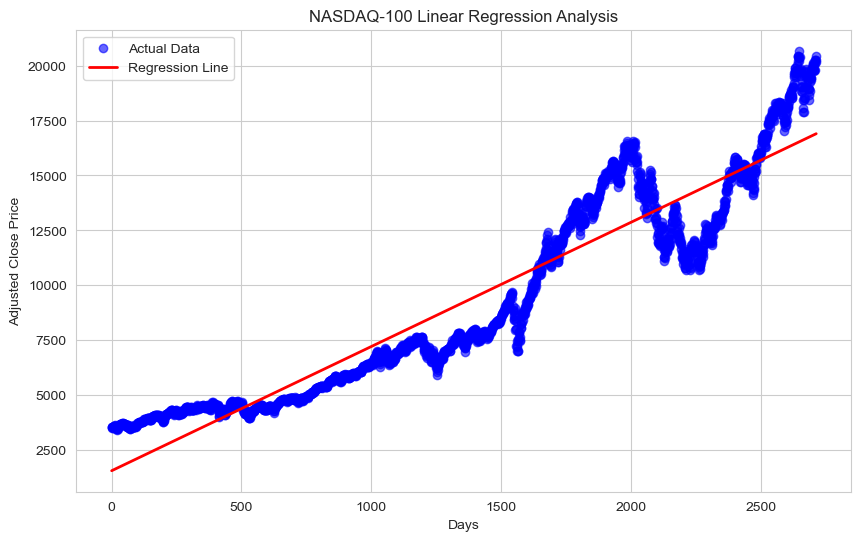

Coefficient: 5.649630952246983
Intercept: 1566.701330054384


In [39]:
nasdaq100 = yf.download("^NDX", start="2014-01-01", end="2024-12-30")

# Extract adjusted closing prices as target variable (y)
y = nasdaq100['Adj Close'].values.reshape(-1, 1)

# Create a feature matrix with a column of integers as the independent variable (X)
X = np.arange(len(nasdaq100)).reshape(-1, 1)

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Plot the actual adjusted closing prices and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Adjusted Close Price')
plt.title('NASDAQ-100 Linear Regression Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficient and intercept of the regression line
print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

[*********************100%%**********************]  1 of 1 completed


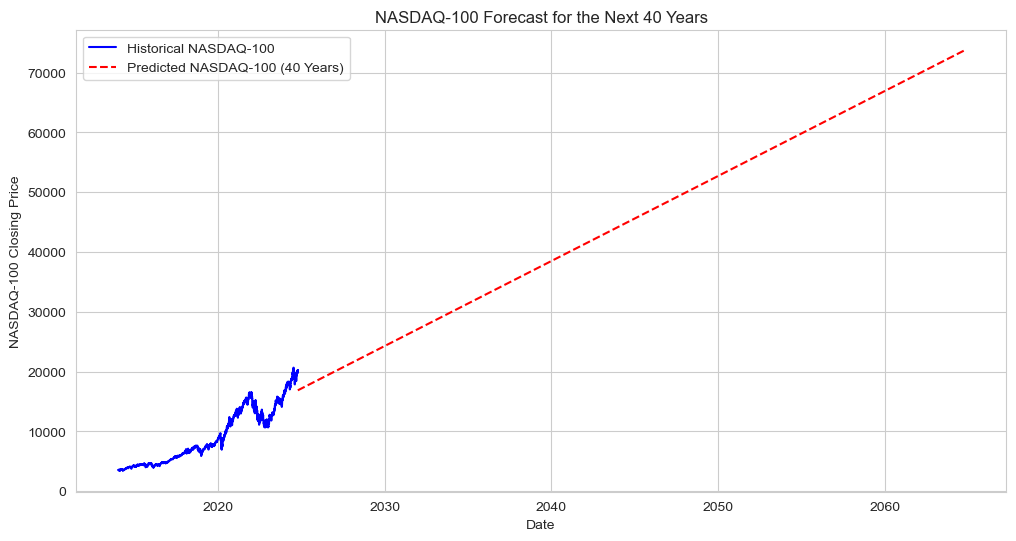

Predicted NASDAQ-100 value in 40 years: 73668.85


In [41]:
nasdaq100 = yf.download("^NDX", start="2014-01-01", end="2024-10-14")

# Create an independent variable (X) representing days since the start of the data
nasdaq100['Days'] = (nasdaq100.index - nasdaq100.index[0]).days

# Extract the adjusted closing prices as the dependent variable (y)
y = nasdaq100['Close'].values.reshape(-1, 1)
X = nasdaq100['Days'].values.reshape(-1, 1)

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Forecast for the next 40 years (14,600 days)
future_days = np.arange(X[-1][0] + 1, X[-1][0] + 1 + (40 * 365)).reshape(-1, 1)  # 40 years (14,600 days)

# Predict future stock prices
future_prices = model.predict(future_days)

# Plot historical data and future predictions
plt.figure(figsize=(12, 6))
plt.plot(nasdaq100.index, nasdaq100['Close'], label='Historical NASDAQ-100', color='blue')
future_dates = pd.date_range(start=nasdaq100.index[-1], periods=len(future_days), freq='D')
plt.plot(future_dates, future_prices, label='Predicted NASDAQ-100 (40 Years)', color='red', linestyle='--')

# Add labels and title
plt.title('NASDAQ-100 Forecast for the Next 40 Years')
plt.xlabel('Date')
plt.ylabel('NASDAQ-100 Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the final predicted value in 40 years
print(f"Predicted NASDAQ-100 value in 40 years: {future_prices[-1][0]:.2f}")

[*********************100%%**********************]  1 of 1 completed


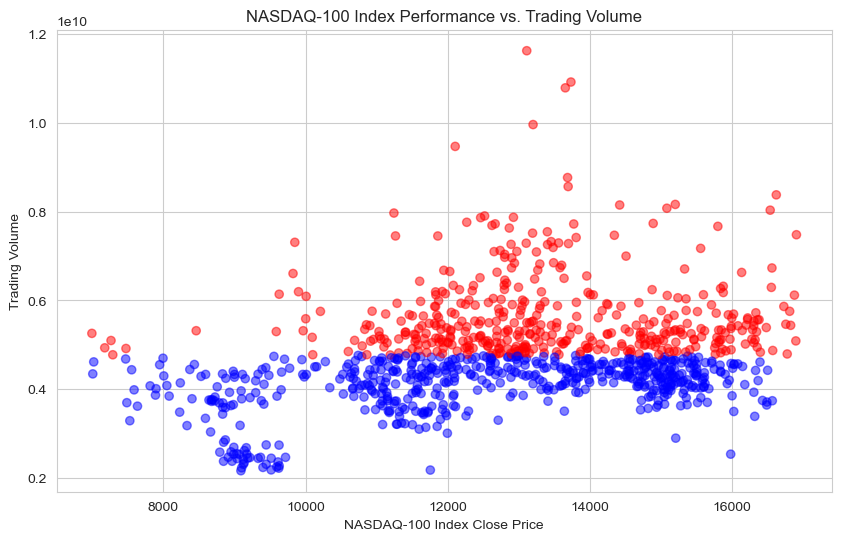

In [45]:
nasdaq100_data = yf.download('^NDX', start='2020-01-01', end='2024-01-01')

# Step 3: Prepare the data
# Extract 'Close' prices and 'Volume'
nasdaq100_close = nasdaq100_data['Close']
nasdaq100_volume = nasdaq100_data['Volume']

# Define colors based on volume (for example, red for high volume, blue for low volume)
colors = ['blue' if volume < nasdaq100_volume.mean() else 'red' for volume in nasdaq100_volume]

# Step 4: Create a scatter plot with different colors
plt.figure(figsize=(10, 6))
plt.scatter(nasdaq100_close, nasdaq100_volume, alpha=0.5, c=colors)
plt.title('NASDAQ-100 Index Performance vs. Trading Volume')
plt.xlabel('NASDAQ-100 Index Close Price')
plt.ylabel('Trading Volume')
plt.grid(True)
plt.show()

# RISK METRICS

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


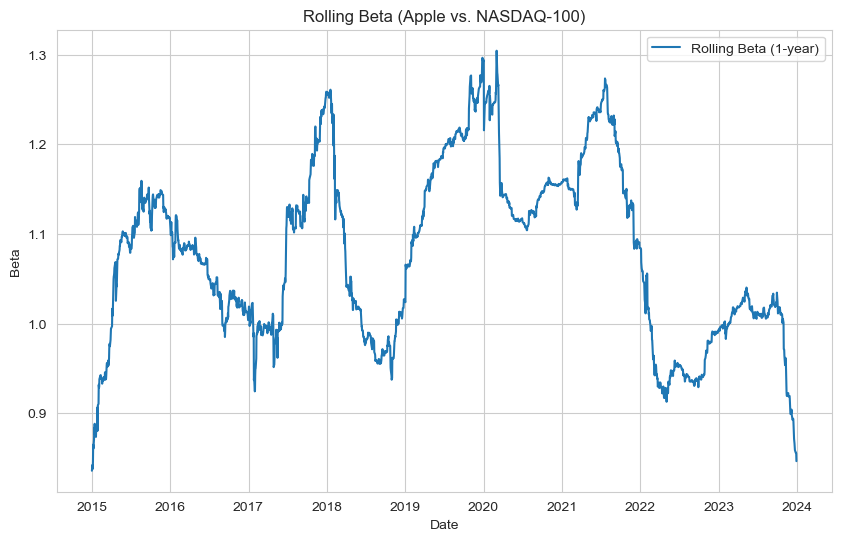

Sharpe Ratio: 0.88
Value at Risk (VaR 95%): -2.67%


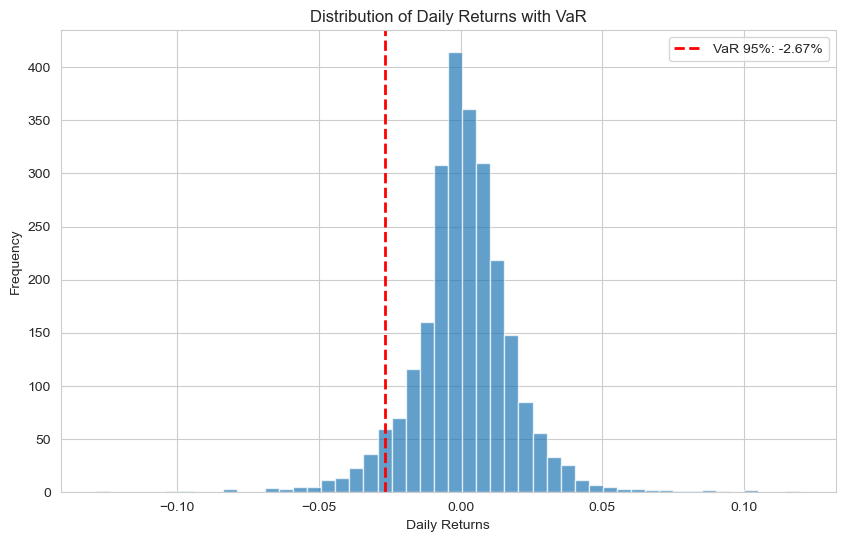

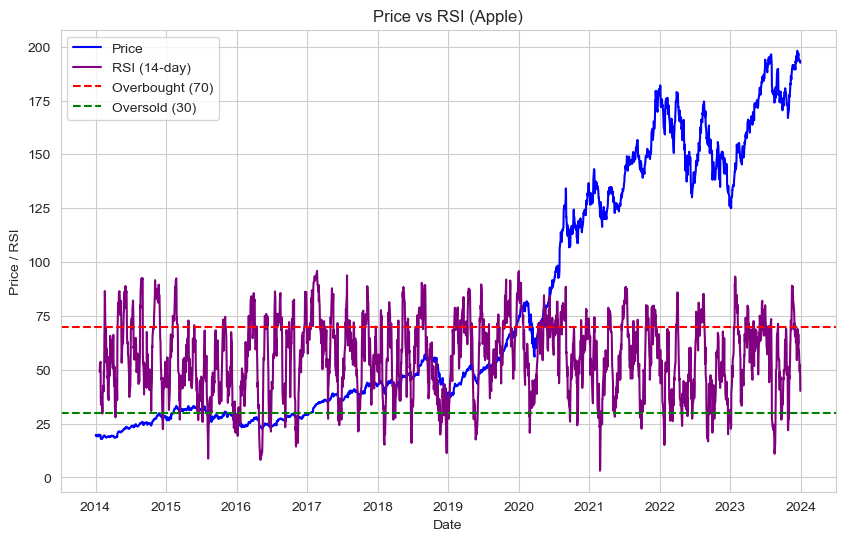

In [42]:

# Load NASDAQ-100 data
nasdaq100 = yf.download('^NDX', start='2014-01-01', end='2024-01-01')
nasdaq100['Daily Returns'] = nasdaq100['Close'].pct_change()

# Example stock from NASDAQ-100 (e.g., Apple)
stock = yf.download('AAPL', start='2014-01-01', end='2024-01-01')
stock['Daily Returns'] = stock['Close'].pct_change()

# Rolling Beta
window_size = 252  # 1-year window for rolling beta
cov_matrix = stock['Daily Returns'].rolling(window_size).cov(nasdaq100['Daily Returns'])
market_var = nasdaq100['Daily Returns'].rolling(window_size).var()
rolling_beta = cov_matrix / market_var

# Visualize Rolling Beta
plt.figure(figsize=(10, 6))
plt.plot(rolling_beta, label='Rolling Beta (1-year)')
plt.title('Rolling Beta (Apple vs. NASDAQ-100)')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.legend()
plt.show()

# Sharpe Ratio Calculation
risk_free_rate = 0.02  # Assume 2% risk-free rate
excess_returns = stock['Daily Returns'] - (risk_free_rate / 252)
sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * np.sqrt(252)
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

# Value at Risk (VaR) - 95% confidence level
confidence_level = 0.95
var = np.percentile(stock['Daily Returns'].dropna(), (1 - confidence_level) * 100)
print(f'Value at Risk (VaR 95%): {var * 100:.2f}%')

# Plot VaR distribution
plt.figure(figsize=(10, 6))
plt.hist(stock['Daily Returns'].dropna(), bins=50, alpha=0.7)
plt.axvline(var, color='r', linestyle='dashed', linewidth=2, label=f'VaR 95%: {var * 100:.2f}%')
plt.title('Distribution of Daily Returns with VaR')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# RSI Calculation and Plot
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock['RSI'] = calculate_rsi(stock)

plt.figure(figsize=(10, 6))
plt.plot(stock.index, stock['Close'], label='Price', color='blue')
plt.plot(stock.index, stock['RSI'], label='RSI (14-day)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Price vs RSI (Apple)')
plt.xlabel('Date')
plt.ylabel('Price / RSI')
plt.legend()
plt.grid(True)
plt.show()


## Risk and Performance Analysis for Apple

In this analysis, we evaluate Apple's stock performance and risk using multiple financial metrics:

1. **Rolling Beta** provides insight into how Apple's volatility compares to the NASDAQ-100 index over time.
2. **Sharpe Ratio** quantifies Apple's risk-adjusted return, helping assess whether the return justifies the risk.
3. **Value at Risk (VaR)** highlights the potential downside risk by showing the maximum loss at a 95% confidence level.
4. **Relative Strength Index (RSI)** helps identify potential overbought or oversold conditions, which could indicate buying or selling opportunities.

These risk metrics and visualizations provide a comprehensive view of Apple's stock, helping investors make informed decisions based on volatility, momentum, and risk-adjusted returns.


In [43]:
nasdaq100 = yf.Ticker("^NDX")
nasdaq100_data = nasdaq100.history(start="2014-01-01")

# Calculate average volume
average_volume = nasdaq100_data['Volume'].mean()

# Calculate price volatility (High - Low)
price_volatility = nasdaq100_data['High'] - nasdaq100_data['Low']

# Calculate percentage change in closing prices
price_change = nasdaq100_data['Close'].pct_change() * 100

# Calculate rolling mean of closing prices (50 days)
rolling_mean_50 = nasdaq100_data['Close'].rolling(window=50).mean()

# Print the results
print("Average Volume:", average_volume)
print("Price Volatility:", price_volatility)
print("Price Change (%):", price_change)
print("Rolling Mean of Closing Prices (50 days):", rolling_mean_50)

Average Volume: 3285449907.9189687
Price Volatility: Date
2014-01-02 00:00:00-05:00     23.380127
2014-01-03 00:00:00-05:00     29.899902
2014-01-06 00:00:00-05:00     30.070068
2014-01-07 00:00:00-05:00     27.489990
2014-01-08 00:00:00-05:00     24.029785
                                ...    
2024-10-09 00:00:00-04:00    236.560547
2024-10-10 00:00:00-04:00    197.041016
2024-10-11 00:00:00-04:00    171.019531
2024-10-14 00:00:00-04:00    138.839844
2024-10-15 00:00:00-04:00    400.750000
Length: 2715, dtype: float64
Price Change (%): Date
2014-01-02 00:00:00-05:00         NaN
2014-01-03 00:00:00-05:00   -0.697056
2014-01-06 00:00:00-05:00   -0.332606
2014-01-07 00:00:00-05:00    0.875829
2014-01-08 00:00:00-05:00    0.272354
                               ...   
2024-10-09 00:00:00-04:00    0.801083
2024-10-10 00:00:00-04:00   -0.133701
2024-10-11 00:00:00-04:00    0.149251
2024-10-14 00:00:00-04:00    0.824193
2024-10-15 00:00:00-04:00   -1.366114
Name: Close, Length: 2715, dtype